Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.special import softmax
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

Load the dataset

In [3]:
irisdata = datasets.load_iris()
irisdata

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Features of the dataset

In [4]:
features = irisdata.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Create variables to classify data for three different models

In [5]:
petal_data = irisdata.data[:, 2:4]
sepal_data = irisdata.data[:, :2]
all_data= irisdata.data
y = irisdata.target

Split the data into 10% test and 90% train

In [6]:
X_train_all, X_test_all, y_train, y_test = train_test_split(all_data, y, test_size=0.1, random_state=42)
X_train_petal, X_test_petal, _, _ = train_test_split(petal_data, y, test_size=0.1, random_state=42)
X_train_sepal, X_test_sepal, _, _ = train_test_split(sepal_data, y, test_size=0.1, random_state=42)

Implement the class LogisticRegression

In [7]:
class LogisticRegression:
    def __init__(self):
        # Initialize Logistic Regression model.
        self.onehot_encoder = None  # One-hot encoder for target variable
        self.weights = None  # Weight matrix
        self.bias = None  # Bias vector
        self.weights_history = []  # List to store weights during training

    def gradient_descent(self, features, target, max_iterations=1000, learning_rate=0.1, regularization=0.0001):
        # One-hot encode the target variable
        self.onehot_encoder = OneHotEncoder()
        encoded_target = self.onehot_encoder.fit_transform(target.reshape(-1, 1))

        # Initialize weights and bias
        self.weights = np.zeros((features.shape[1], encoded_target.shape[1]))
        self.bias = 0

        # Gradient descent loop
        iteration = 0
        while iteration < max_iterations:
            iteration += 1

            # Compute logits and probabilities
            logits = -features @ self.weights + self.bias
            probabilities = softmax(logits, axis=1)

            # Compute gradients
            sample_count = features.shape[0]
            gradient_weights = 1 / sample_count * (features.T @ (encoded_target - probabilities)) + 2 * regularization * self.weights
            gradient_bias = 1 / sample_count * np.sum(encoded_target - probabilities, axis=0) + 2 * regularization * self.bias

            # Update weights and bias
            self.weights -= learning_rate * gradient_weights
            self.bias -= learning_rate * gradient_bias

            # Append current weights to list
            self.weights_history.append(np.copy(self.weights))

        return self.weights, self.bias

    def fit(self, features, target):
        # Perform gradient descent to train the model
        self.weights, self.bias = self.gradient_descent(features, target)

    def predict(self, features):
        # Compute logits and probabilities
        logits = -features @ self.weights + self.bias
        probabilities = softmax(logits, axis=1)
        return np.argmax(probabilities, axis=1)  # Predict class labels


Compare petal length & petal width in model 1

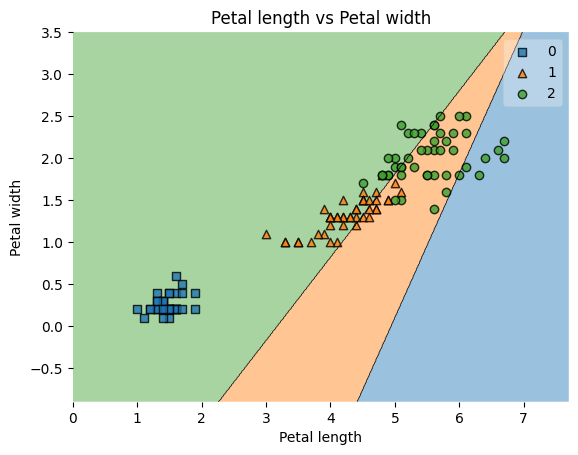

Accuracy for petals:  0.26666666666666666


In [8]:
lrmodel1 = LogisticRegression()
lrmodel1.fit(X_train_petal, y_train)
plot_decision_regions(X_train_petal, y_train, clf=lrmodel1)
plt.title('Petal length vs Petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()
pred1 = lrmodel1.predict(X_test_petal)
accuracy1 = accuracy_score(y_test, pred1)
print("Accuracy for petals: ", accuracy1)

Compare sepal length & sepal width in model 2

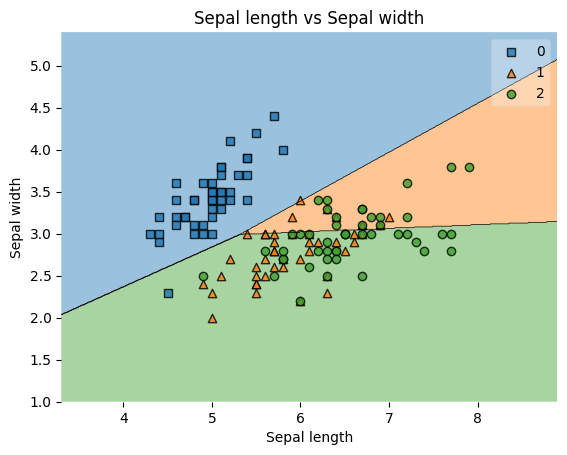

Accuracy for sepals:  0.4666666666666667


In [9]:
lrmodel2 = LogisticRegression()
lrmodel2.fit(X_train_sepal, y_train)
plot_decision_regions(X_train_sepal, y_train, clf=lrmodel2)
plt.title('Sepal length vs Sepal width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
pred2 = lrmodel2.predict(X_test_sepal)
accuracy2 = accuracy_score(y_test, pred2)
print("Accuracy for sepals: ", accuracy2)

Compare all features in model 3

In [10]:
lrmodel3 = LogisticRegression()
lrmodel3.fit(X_train_all, y_train)
pred3 = lrmodel3.predict(X_test_all)
accuracy3 = accuracy_score(y_test, pred3)
print("Accuracy for all features: ", accuracy3)

Accuracy for all features:  1.0


Implement the class LinearDiscriminantAnalysis

In [18]:
class LDA:
    def __init__(self):
        # Initialize Linear Discriminant Analysis (LDA) model.
        self.class_priors = None  # Prior probability for each class
        self.class_means = None  # Mean feature vector for each class
        self.shared_covariance = None  # Shared covariance matrix
        self.unique_classes = None  # Unique classes in the dataset

    def fit(self, features, target):
        # Get unique classes
        self.unique_classes = np.unique(target)
        num_samples, num_features = features.shape
        num_classes = len(self.unique_classes)

        # Initialize class priors, means, and covariance matrix
        self.class_priors = np.zeros(num_classes)
        self.class_means = np.zeros((num_classes, num_features))
        self.shared_covariance = np.zeros((num_features, num_features))

        # Compute class priors, means, and covariance matrix
        for i, class_label in enumerate(self.unique_classes):
            # Select features for the current class
            features_class = features[target == class_label]
            num_class_samples = features_class.shape[0]

            # Compute class priors
            self.class_priors[i] = num_class_samples / num_samples

            # Compute class means
            self.class_means[i, :] = features_class.mean(axis=0)

            # Compute shared covariance matrix
            self.shared_covariance += np.cov(features_class, rowvar=False) * (num_class_samples - 1)

        self.shared_covariance /= num_samples - num_classes

    def predict(self, features):
        # Predict class labels for the input data.
        num_samples, _ = features.shape
        predicted_labels = np.zeros(num_samples)

        for i in range(num_samples):
            posteriors = []

            # Compute posterior probability for each class
            for j, class_label in enumerate(self.unique_classes):
                class_prior = np.log(self.class_priors[j])
                class_mean = self.class_means[j, :]
                class_covariance = self.shared_covariance
                likelihood = -0.5 * (features[i, :] - class_mean) @ np.linalg.inv(class_covariance) @ (features[i, :] - class_mean).T
                posterior = class_prior + likelihood
                posteriors.append(posterior)

            # Assign the class with the highest posterior probability
            predicted_labels[i] = self.unique_classes[np.argmax(posteriors)]

        return predicted_labels


Compare petal length & petal width in LDA model 1

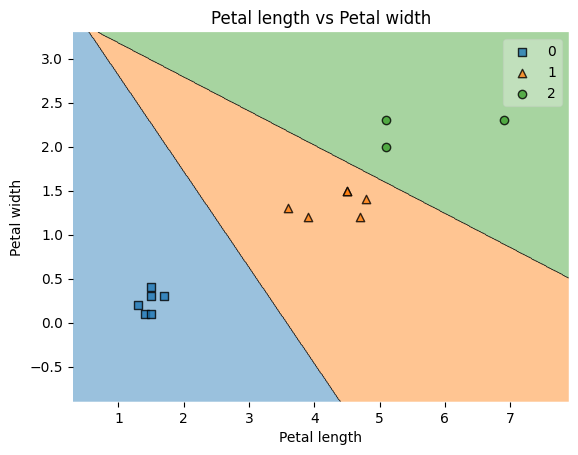

Accuracy for petals:  1.0


In [19]:
ldamodel1 = LinearDiscriminantAnalysis()
ldamodel1.fit(X_train_petal, y_train)
plot_decision_regions(X_test_petal, y_test, clf=ldamodel1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal length vs Petal width')
plt.show()
pred1 = ldamodel1.predict(X_test_petal)
accuracy1 = accuracy_score(y_test, pred1)
print("Accuracy for petals: ", accuracy1)

Compare sepal length & sepal width in LDA model 2

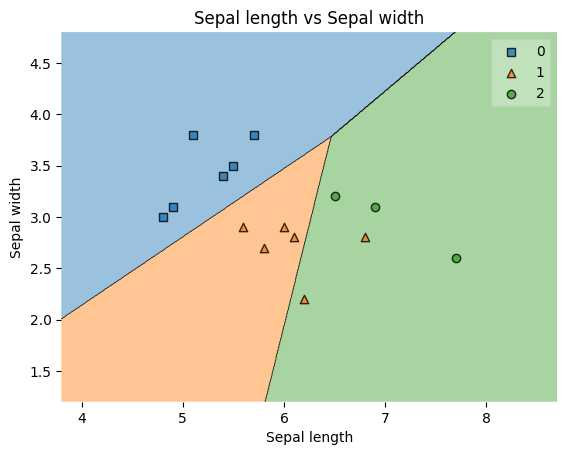

Accuracy for sepals:  0.8666666666666667


In [20]:
ldamodel2 = LinearDiscriminantAnalysis()
ldamodel2.fit(X_train_sepal, y_train)
plot_decision_regions(X_test_sepal, y_test, clf=ldamodel2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal length vs Sepal width')
plt.show()
pred2 = ldamodel2.predict(X_test_sepal)
accuracy2 = accuracy_score(y_test, pred2)
print("Accuracy for sepals: ", accuracy2)

Compare all features in LDA model 3

In [21]:
ldamodel3 = LinearDiscriminantAnalysis()
ldamodel3.fit(X_train_all, y_train)
pred3 = ldamodel3.predict(X_test_all)
accuracy3 = accuracy_score(y_test, pred3)
print("Accuracy for all features: ", accuracy3)

Accuracy for all features:  1.0
